In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS
using Plots; gr();

  Activating environment at `~/.julia/dev/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1342


In [2]:
if false
    ϵ = 0.48
    κ = 1.68
    δ = 0.21
    R0 = 6.2
    B0 = 5.3
    ip = 15.E6
    beta_n = 1.0
    x_point=(5.0,-6.0)
    symmetric=true

    resolution = 129

    dd = IMAS.dd()
    resize!(dd.equilibrium.time_slice,1)
    FUSE.init(dd.equilibrium.time_slice[1]; B0, R0, ϵ, δ, κ, beta_n, ip, x_point=x_point)

    eqactor = FUSE.SolovevEquilibriumActor(dd.equilibrium.time_slice[1], symmetric=symmetric)
    @time FUSE.step(eqactor)
    dd.equilibrium.time_slice[1] = FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2),0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2))
    dd.equilibrium.time_slice[1].global_quantities.li_3 = 1.0 # made up!
    dd.equilibrium.time_slice[1].time=0.0
    dd.equilibrium.time=[0.0]
    dd.equilibrium.vacuum_toroidal_field.r0=R0
    dd.equilibrium.vacuum_toroidal_field.b0=[B0]

    plot(dd.equilibrium.time_slice[1])
    dd.equilibrium.time_slice[1];
else
    filename=joinpath(dirname(abspath(@__FILE__)), "..", "sample","CAT_eq_ods.json")
    dd = IMAS.json2imas(filename);
    IMAS.flux_surfaces(dd.equilibrium);
end

equilibrium.ids_properties was skipped in IMAS.jl data dictionary


time ➡ 1-element Vector{Float64}
time_slice
｜[1]
｜｜boundary
｜｜｜elongation ➡ Function
｜｜｜elongation_lower ➡ Function
｜｜｜elongation_upper ➡ Function
｜｜｜geometric_axis
｜｜｜｜r ➡ Function
｜｜｜｜z ➡ Function
｜｜｜minor_radius ➡ Function
｜｜｜outline
｜｜｜｜r ➡ 91-element Vector{Float64}
｜｜｜｜z ➡ 91-element Vector{Float64}
｜｜｜squareness_lower_inner ➡ Function
｜｜｜squareness_lower_outer ➡ Function
｜｜｜squareness_upper_inner ➡ Function
｜｜｜squareness_upper_outer ➡ Function
｜｜｜triangularity ➡ Function
｜｜｜triangularity_lower ➡ Function
｜｜｜triangularity_upper ➡ Function
｜｜｜x_point
｜｜｜｜[1]
｜｜｜｜｜r ➡ 3.194865405982973
｜｜｜｜｜z ➡ -2.6679803806386997
｜｜｜｜[2]
｜｜｜｜｜r ➡ 4.449185197594817
｜｜｜｜｜z ➡ -0.0012635110785437957
｜｜global_quantities
｜｜｜beta_normal ➡ 3.513954187526015
｜｜｜beta_pol ➡ 2.2983831285611163
｜｜｜beta_tor ➡ 0.03051798289173166
｜｜｜energy_mhd ➡ Function
｜｜｜ip ➡ 8.120197499085797e6
｜｜｜length_pol ➡ 12.685418442183519
｜｜｜li_3 ➡ 0.4828948226608098
｜｜｜magnetic_axis
｜｜｜｜b_field_tor ➡ 6.292948078332784
｜｜｜｜r ➡ 4.44942

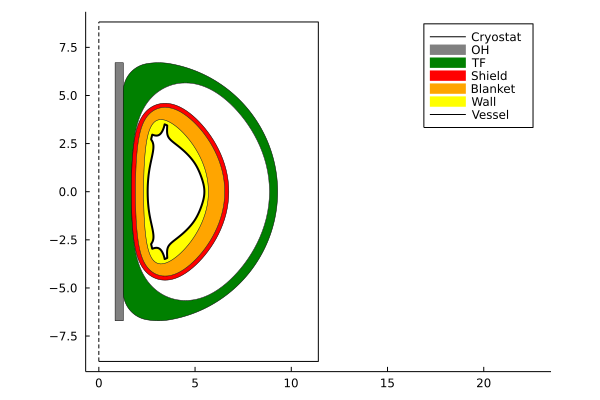

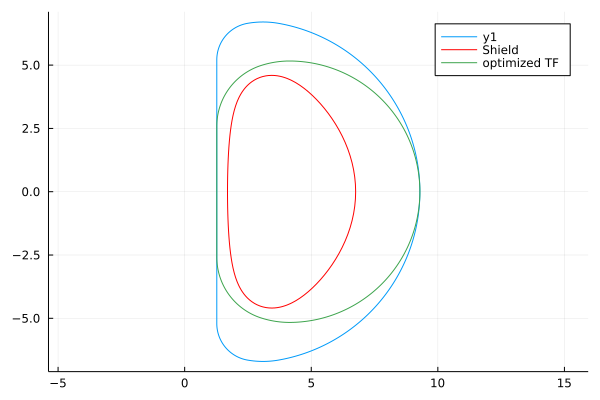

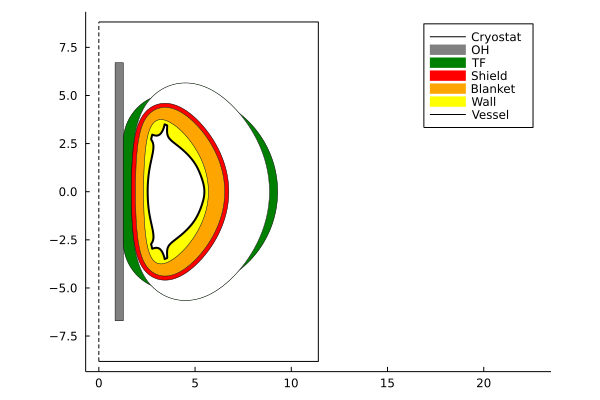

In [6]:
# Initialize eq, build
eqt=dd.equilibrium.time_slice[1]
build=dd.radial_build=IMAS.radial_build()
FUSE.init(build, eqt, is_nuclear_facility=true, conformal_wall=true);
display(plot(build))

# TF optimizer actor
target_minimum_distance = 15
index_TF = IMAS.get_radial_build(build, type=2, hfs=1; return_index=true)

plot(build.layer[index_TF].outline.r, build.layer[index_TF].outline.z,aspect_ratio = :equal ,label="initial TF")
# R_shape, Z_shape = FUSE.quick_box(60,80,70)

R_shape = build.layer[5].outline.r # Shield
Z_shape = build.layer[5].outline.z # Shield
TF_actor = FUSE.TFCoilActor(build, R_shape, Z_shape, target_minimum_distance)
FUSE.step(TF_actor; time_limit=50)
FUSE.finalize(TF_actor)

plot!(build.layer[5].outline.r, build.layer[5].outline.z,label="Shield", color="red")
display(plot!(build.layer[3].outline.r, build.layer[3].outline.z,label="optimized TF"))

plot(build)

